In [29]:
#Sophi'e 1st edge - experimental

In [30]:
from pyvis.network import Network
import pandas as pd
import numpy as np

In [31]:
#df1=pd.read_csv('Sophi-edge1.csv')
df1=pd.read_csv('q1NodeEdge.csv')
#df2=pd.read_csv('q1NodeEdge.csv')

In [32]:
#df1['Function'].value_counts()[:20].plot(kind='barh')

In [33]:
#Set the TrustScore threshhold
df1 = df1.query( 'TrustScore >25')

In [34]:
#set the department
df1 = df1.query('Function == "Corporate"')

In [35]:
#set prams for output
df1_net =Network(
    height="100%",
    width="100%",
    bgcolor="#222222",
    font_color="white"
)    

In [36]:
# set the physics layout of the network
#got_net.barnes_hut()
#df1_net.repulsion()
df1_net.toggle_hide_edges_on_drag(True)

In [37]:
#set nodes to (str)
df1['sender'] = df1['sender'].apply(str)
df1['recipient'] = df1['recipient'].apply(str)

In [38]:
sources =df1['sender']
targets =df1['recipient']
weights =df1['TrustScore']
comb =df1['comb']

In [39]:
edge_data =zip(sources, targets, weights, comb)

In [40]:
for e in edge_data:
    src =e[0] #source
    dst =e[1] #destination
    w=e[2]    #weight 
    c=e[3]
    if c== 'IndiaCypress':
        df1_net.add_node(src, src, title=src, color='#CE93D8')
        df1_net.add_node(dst, dst, title=dst, color='#CE93D8')
    if c== 'United StatesCypress':  
        df1_net.add_node(src, src, title=src, color='#6A1B9A')
        df1_net.add_node(dst, dst, title=dst, color='#6A1B9A')
    if c== 'IndiaInfineon':
        df1_net.add_node(src, src, title=src, color='#00CCFF')
        df1_net.add_node(dst, dst, title=dst, color='#00CCFF')
    if c== 'United StatesInfineon':
        df1_net.add_node(src, src, title=src, color='#0000FF')
        df1_net.add_node(dst, dst, title=dst, color='#0000FF')    
   
    df1_net.add_edge(src, dst, value=w, title=w, color='#546E7A')
 
    neighbor_map =df1_net.get_adj_list()

In [41]:
# add neighbor data to node hover data
for node in df1_net.nodes:
   
    node["title"]+= " Neighbors:<br>" +\
            "<br>".join(neighbor_map[node["id"]])
    node["value"]=len(neighbor_map[node["id"]])
    
    #get_nodes(df1_net)
df1_net.set_edge_smooth('dynamic')
#df1_net.show("Q1-R&D-TS31.html")
df1_net.show("Q1-Corporate-TS25.html")

<AxesSubplot:>

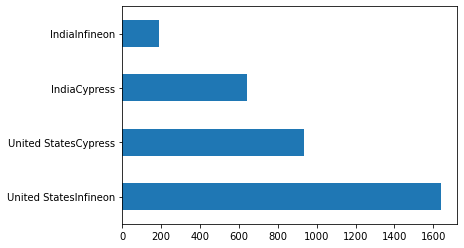

In [17]:
df1['comb'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

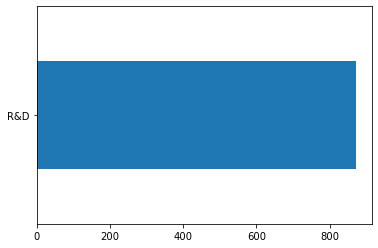

In [ ]:
import nxviz as nv
ax = nv.circos(
    G,
    group_by="group",
    sort_by="value",
    node_color_by="group",
    edge_alpha_by="edge_value"
)

nv.annotate.circos_group(G, group_by="group")
